In [ ]:
#librairie pandas
import pandas
import numpy
import matplotlib.pyplot as plt
#version
#chargement de la première feuille de données
XXX = pandas.read_csv("projects.csv")

In [2]:
status = {
"recorded": 1,
"qualified": 2,
"in progress": 3,
"done": 4,
"verified": 5,
"delivered": 6,
"closed": 7,
"re-opened": 8,
"cancelled": 9,
"assigned": 10,
"accepted": 11,
"validated": 12,
"prepared": 13,
"copied": 14
}
tp = {
"Fixed Price": 1,
"Administrative": 2,
"Time & Materials": 3
}
XX =  XXX[['done','type','status','realWork','realCost']]
XX["status"] = XXX["status"].map(status)
XX["type"] = XXX["type"].map(tp)
X = XX.replace(numpy.nan,0)
X

<ipython-input-2-ddce7e3e561e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XX["status"] = XXX["status"].map(status)
<ipython-input-2-ddce7e3e561e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XX["type"] = XXX["type"].map(tp)


,done,type,status,realWork,realCost
0,0,1,1,0.00,0.0
1,0,1,1,113.50,0.0
2,0,1,1,0.00,0.0
3,1,1,4,18.75,775.0
4,0,1,1,0.00,0.0
...,...,...,...,...,...
95,0,1,1,10.50,0.0
96,0,1,1,22.25,0.0
97,0,1,1,83.50,0.0
98,0,1,1,24.75,0.0


In [3]:
#dimension
print(X.shape) # (18, 6)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
#affichage des données
print(X)

(100, 5)
    done  type  status  realWork  realCost
0      0     1       1      0.00       0.0
1      0     1       1    113.50       0.0
2      0     1       1      0.00       0.0
3      1     1       4     18.75     775.0
4      0     1       1      0.00       0.0
..   ...   ...     ...       ...       ...
95     0     1       1     10.50       0.0
96     0     1       1     22.25       0.0
97     0     1       1     83.50       0.0
98     0     1       1     24.75       0.0
99     0     1       1      5.75       0.0

[100 rows x 5 columns]


In [4]:
#scikit-learn
import sklearn
#vérification de la version
print(sklearn.__version__) # 0.19.1

0.23.2


In [5]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.86831002e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -1.97840880e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.86831002e-01
  -2.03990433e-01]
 [ 7.00000000e+00 -1.35388105e-01  1.67117643e+00 -2.72129991e-01
  -1.02060978e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.86831002e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.41943914e-01
  -3.95880854e-02]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -1.69614938e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.34691415e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.86831002e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.81538638e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.86831002e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01  1.67117643e+00  6.16456084e+00

In [6]:
#moyenne
print(numpy.mean(Z,axis=0))

[-2.16493490e-17 -9.76996262e-17  3.99680289e-17  1.55431223e-17
  6.21724894e-17]


In [7]:
#écart-type
print(numpy.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1.]


In [8]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [9]:
#affichage des paramètres
print(acp)

PCA(svd_solver='full')


In [10]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 5


5


In [11]:
#variance expliquée
print(acp.explained_variance_)

[2.10882381 1.25894483 0.9613152  0.64755187 0.07386935]


In [12]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[2.08773557 1.24635538 0.95170204 0.64107635 0.07313065]


In [13]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[2.08773557 1.24635538 0.95170204 0.64107635 0.07313065]


In [14]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.41754711 0.24927108 0.19034041 0.12821527 0.01462613]


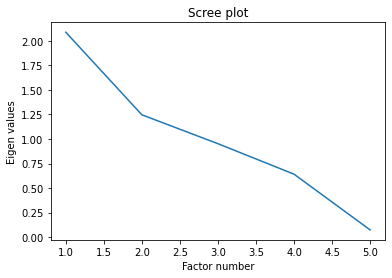

In [15]:
#scree plot
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

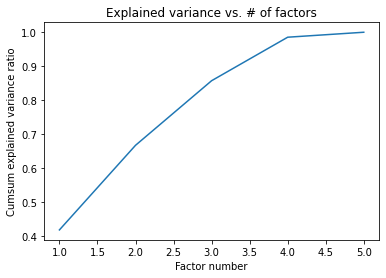

In [16]:
#cumul de variance expliquée
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [17]:
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]

In [18]:
#test des bâtons brisés
print(pandas.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    2.087736  2.283333
1    1.246355  1.283333
2    0.951702  0.783333
3    0.641076  0.450000
4    0.073131  0.200000


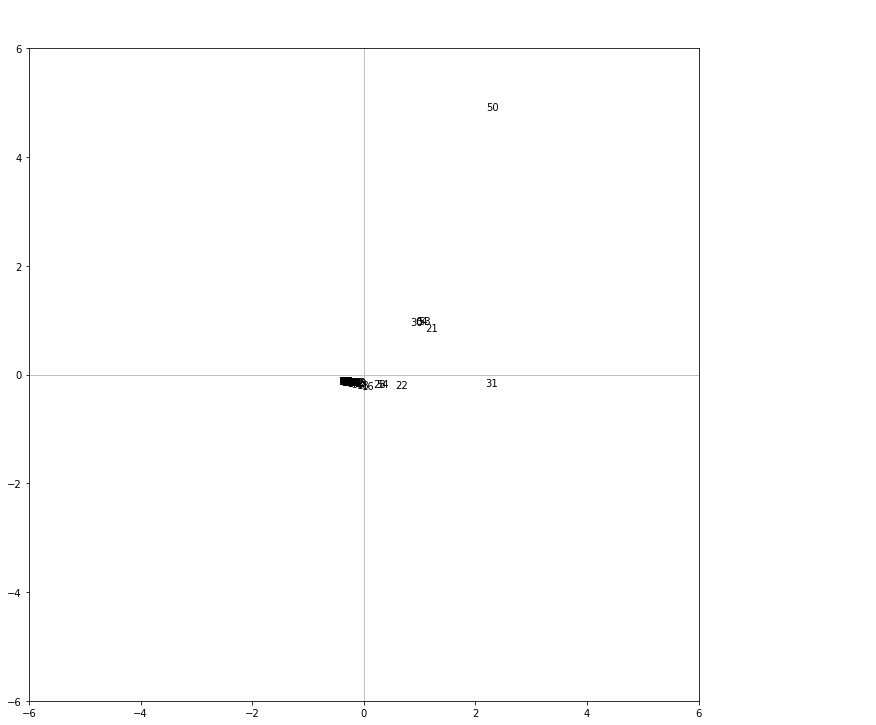

In [19]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.savefig('bb.png')
plt.show()



In [20]:
def chart1():
    import base64
    with open("bb.png", "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())


    return encoded_string.decode('utf-8')

In [21]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pandas.DataFrame({'ID':X.index,'d_i':di}))

    ID        d_i
0    0   0.232608
1    1   0.189477
2    2   0.232608
3    3  51.895632
4    4   0.232608
..  ..        ...
95  95   0.227954
96  96   0.222905
97  97   0.199338
98  98   0.221853
99  99   0.230043

[100 rows x 2 columns]


In [22]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pandas.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

    id    COS2_1    COS2_2
0    0  0.833322  0.141940
1    1  0.787085  0.182010
2    2  0.833322  0.141940
3    3  0.005936  0.746618
4    4  0.833322  0.141940
..  ..       ...       ...
95  95  0.831120  0.145429
96  96  0.828215  0.149401
97  97  0.804572  0.171041
98  98  0.827534  0.150254
99  99  0.832161  0.143844

[100 rows x 3 columns]


In [23]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [24]:
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pandas.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

    id     CTR_1     CTR_2
0    0  0.000928  0.000265
1    1  0.000714  0.000277
2    2  0.000928  0.000265
3    3  0.001475  0.310876
4    4  0.000928  0.000265
..  ..       ...       ...
95  95  0.000907  0.000266
96  96  0.000884  0.000267
97  97  0.000768  0.000274
98  98  0.000879  0.000267
99  99  0.000917  0.000265

[100 rows x 3 columns]


In [25]:
#vérifions la théorie
print(numpy.sum(ctr,axis=0))

[1. 1. 1. 1. 1.]


In [26]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.04357782  0.31646452  0.31422389  0.60782321  0.655565  ]
 [ 0.73658346 -0.25373462  0.60097237 -0.04496843 -0.17283979]
 [ 0.30329613  0.85027189 -0.04799869 -0.42733525 -0.01139665]
 [-0.60179537  0.15922788  0.7294458  -0.18653729 -0.21354503]
 [ 0.03741084  0.29521712 -0.07550167  0.64118422 -0.70329906]]


In [27]:
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)

In [28]:
#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.06296558  0.82232389  0.2958812  -0.48184096  0.01011689]
 [ 0.45725953 -0.28327006  0.82948459  0.12748937  0.07983462]
 [ 0.45402206  0.67092728 -0.04682522  0.58404715 -0.02041767]
 [ 0.87824367 -0.05020288 -0.41688783 -0.14935527  0.1733934 ]
 [ 0.94722577 -0.19295884 -0.01111803 -0.17097962 -0.19019091]]


In [29]:
#on affiche pour les deux premiers axes
print(pandas.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

         id     COR_1     COR_2
0      done  0.062966  0.822324
1      type  0.457260 -0.283270
2    status  0.454022  0.670927
3  realWork  0.878244 -0.050203
4  realCost  0.947226 -0.192959


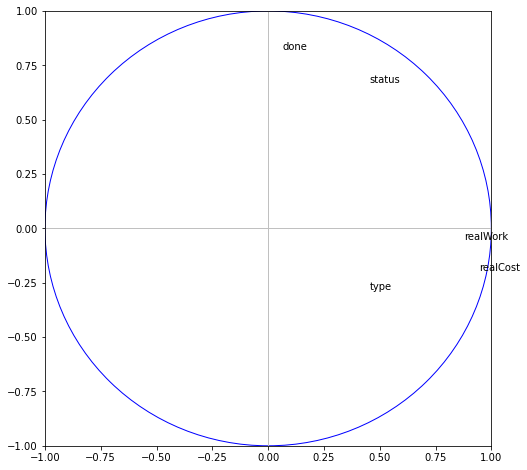

In [30]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.savefig('aa.png')

plt.show()


In [31]:
def chart2():
    import base64
    with open("aa.png", "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())


    return encoded_string.decode('utf-8')

# ACH ressource

In [32]:
import pandas as pd
import numpy as np
XXX = pd.read_csv("c.csv")
XXX.set_index('name')
XXX

,id,name,fullName,password,idProfile,isResource,idTeam,idRole,isContact,initials,...,crypto,cookieHash,passwordChangeDate,apiKey,profile,profileCode,role,role_descrip,team,idResource
0,1,Resource 1,Resource 1,12345,1,0,0,0,0,NaN,...,sha256,NaN,2020-08-11 00:00:00,dd740454184b5f2aa2c21c293853cfeb,profileAdministrator,ADM,NaN,NaN,NaN,NaN
1,2,Resource 2,Resource 2,12345,5,0,0,0,0,NaN,...,NaN,NaN,2018-02-19 00:00:00,a758923aa8beca9b472422f815864ddd,profileGuest,G,NaN,NaN,NaN,NaN
2,3,Resource 3,Resource 3,12345,3,1,0,0,1,BK,...,sha256,NaN,2018-04-24 00:00:00,84308598f76cdf395e681cfac2d21140,profileProjectLeader,PL,NaN,NaN,NaN,NaN
3,4,Resource 4,Resource 4,12345,1,1,1,1,1,AM,...,sha256,NaN,2020-06-05 00:00:00,5c6637f47a8f347ebb8c52d27630f6ac,profileAdministrator,ADM,Manager,Leader/Manager of the project,Abacus Team,7.0
4,5,Resource 5,Resource 5,12345,1,1,0,0,1,EM,...,sha256,NaN,2020-07-09 00:00:00,d8b3c8a98f4ee4c6469dbd9e46579883,profileAdministrator,ADM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,Resource 59,Resource 59,12345,4,1,0,0,1,SA,...,sha256,d6f097755e0321899cbc4341e72f5217,2020-07-13 00:00:00,99ec235c26e8d7255c178eee0030647b,profileTeamMember,TM,NaN,NaN,NaN,NaN
59,60,Resource 60,Resource 60,12345,5,1,0,0,1,HZ,...,sha256,NaN,NaN,0c6e0c658972fc918749a1a8061e73cd,profileGuest,G,NaN,NaN,NaN,NaN
60,61,Resource 61,Resource 61,12345,2,0,0,0,0,HBH,...,sha256,c4c1e94633be80426c79eada4f565d40,2020-10-22 00:00:00,81b896f1e83961bb44e5750f42e612cd,profileSupervisor,SUP,NaN,NaN,NaN,NaN
61,62,Resource 62,Resource 62,12345,4,1,0,0,1,AA,...,sha256,625151a0afd2b01256a8fb71a350edeb,2020-11-23 00:00:00,5dd7ef0c6bbfc4ce9bc2e5344cac11c4,profileTeamMember,TM,NaN,NaN,NaN,NaN


In [33]:
XX =  XXX[['idProfile','idTeam','idRole']]
data_decathlon = XX.replace(np.nan,0)
data_decathlon

,idProfile,idTeam,idRole
0,1,0,0
1,5,0,0
2,3,0,0
3,1,1,1
4,1,0,0
...,...,...,...
58,4,0,0
59,5,0,0
60,2,0,0
61,4,0,0


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
new=data_decathlon.iloc[:,[0,1,2]]
def Ressource1():
    from sklearn.cluster import AgglomerativeClustering
    ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(new)
    dendro = [ ]
    for a,b in ward.children_:
        dendro.append([a,b,float(len(dendro)+1),len(dendro)+1])

    from scipy.cluster.hierarchy import dendrogram
    fig = plt.figure( figsize=(8,8) )
    ax = fig.add_subplot(1,1,1)

    r = dendrogram(dendro, color_threshold=1, labels=new.index, show_leaf_counts=True, ax=ax, orientation = "left")
    plt.savefig('books_read.png')
    import base64

    with open("books_read.png", "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())


    return encoded_string.decode('utf-8')

In [35]:
# Kmeans ressource

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
ressource = pd.read_csv('c.csv')
ressource = ressource.replace(np.nan,0)
ressource.head()
X3ressource = ressource[['idProfile' , 'idRole' ,'idTeam']].iloc[: , :].values
inertiaressource = []
for n in range(1 , 11):
    algorithmressource = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithmressource.fit(X3ressource)
    inertiaressource.append(algorithmressource.inertia_)
algorithmressource = (KMeans(n_clusters = 10 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithmressource.fit(X3ressource)
labels3ressource = algorithmressource.labels_
centroids3ressource = algorithmressource.cluster_centers_

In [37]:
import json
def Ressource2():
    ressource['label3ressource'] =  labels3ressource
    trace1 = go.Scatter3d(
        x= ressource['profile'],
        y= ressource['role'],
        z= ressource['team'],
        mode='markers',
         marker=dict(
            color = ressource['label3ressource'], 
            size= 20,
            line=dict(
                color= ressource['label3ressource'],
                width= 12
            ),
            opacity=0.8
         )
    )
    data = [trace1]
    layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
        title= 'Clusters',
        scene = dict(
                xaxis = dict(title  = 'profile'),
                yaxis = dict(title  = 'role'),
                zaxis = dict(title  = 'team')
            )
    )
    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)
    plot_json = json.dumps(fig, cls=py.utils.PlotlyJSONEncoder)
    return plot_json

# Tasks

In [38]:
#librairie pandas
import pandas
import numpy
import matplotlib.pyplot as plt
#version
print(pandas.__version__) # 0.23.0
#chargement de la première feuille de données
task = pandas.read_csv("tasks.csv")

1.1.3


In [39]:
status = {
"recorded": 1,
"qualified": 2,
"in progress": 3,
"done": 4,
"verified": 5,
"delivered": 6,
"closed": 7,
"re-opened": 8,
"cancelled": 9,
"assigned": 10,
"accepted": 11,
"validated": 12,
"prepared": 13,
"copied": 14
}
tp = {
"Task": 1
}
task =  task[['done','type','status','realWork','realCost','realDuration','progress']]
task["status"] = task["status"].map(status)
task["type"] = task["type"].map(tp)
task = task.replace(numpy.nan,0)


In [40]:
#dimension
#nombre d'observations
nn = task.shape[0]
#nombre de variables
pp = task.shape[1]
#affichage des données
import sklearn
from sklearn.preprocessing import StandardScaler
#instanciation
scc = StandardScaler()
#transformation – centrage-réduction
ZZ = scc.fit_transform(task)
from sklearn.decomposition import PCA
#instanciation
acpp = PCA(svd_solver='full')
coordd = acpp.fit_transform(ZZ)
eigvall = (nn-1)/nn*acpp.explained_variance_


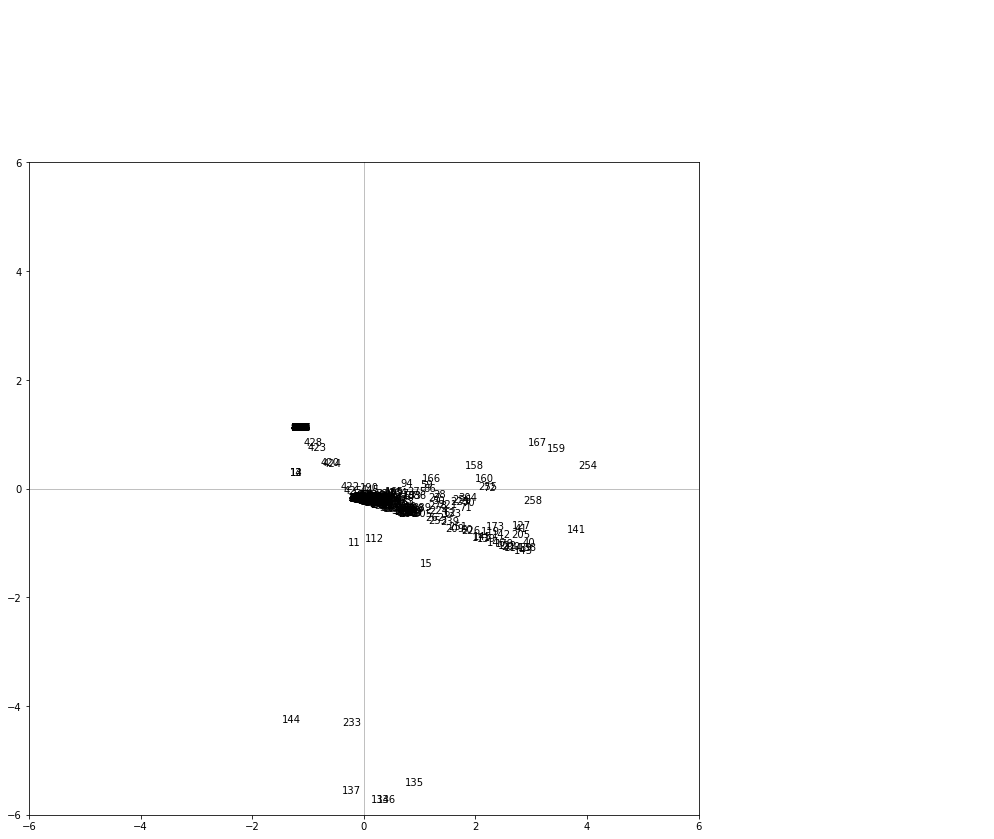

In [41]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(nn):
 plt.annotate(task.index[i],(coordd[i,0],coordd[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.savefig('task1.png')
plt.show()

In [42]:
#contribution des individus dans l'inertie totale
dii = numpy.sum(ZZ**2,axis=1)
#qualité de représentation des individus - COS2
cos22 = coordd**2
for j in range(pp):
    cos22[:,j] = cos22[:,j]/dii
ctrr = coordd**2
for j in range(pp):
    ctrr[:,j] = ctrr[:,j]/(nn*eigvall[j])
sqrt_eigvall = numpy.sqrt(eigvall)
corvarr = numpy.zeros((pp,pp))
for k in range(pp):
    corvarr[:,k] = acpp.components_[k,:] * sqrt_eigvall[k]


In [43]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(pp):
    plt.annotate(task.columns[j],(corvarr[j,0],corvarr[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.savefig('task2.png')
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAf0AAAHWCAYAAAB9p1B9AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAABXmklEQVR4nO3deZxOdf/H8dfX2JcsiZAsZR9mxjZkGUuWpGgPiSJU6u7urqTuSmnT4tetTSrRJiEpZUkYFcnQCNmlbNmSjH1mvr8/vtcwGMyYa+Zcy/v5eFyPuZZzzvU5s72vc853MdZaREREJPTl8boAERERyR0KfRERkTCh0BcREQkTCn0REZEwodAXEREJEwp9ERGRMOGX0DfGjDbG7DDGLD/N68YYM8IYs84Y84sxpn661zoaY1b7XnvYH/WIiIjIqfx1pD8G6HiG168Aqvlu/YA3AYwxEcDrvtdrA92MMbX9VJOIiIik45fQt9bOA/46wyJdgPet8yNQwhhTDmgMrLPWbrDWHgE+8S0rIiIifpZb1/QrAJvSPd7se+50z4uIiIif5c2l9zEZPGfP8PypGzCmH+7SAEWKFGlQs2ZN/1UnEsRSU+Ho0bPfkpMhTx53i4g4+1cAY078WqjQPg4eLEb60butdTWkpkJKyvGvafdPfj4iAvLlO/strQYRgcWLF++y1l6Q3e3kVuhvBiqme3wRsBXIf5rnT2GtHQWMAmjYsKFNSEjImUpFAtDff8Patcdva9a4r+vWwf79cOGFUK7c8dvJj8uVgzJlIG82/+Lj4+OJi4s75/Wthb/+gm3b3O3PP4/fT//cH3+4DylVqkC1alC9uvuaditf/vgHEZFwYIz53R/bya3Q/wIYaIz5BIgF9lprtxljdgLVjDFVgC3AzUD3XKpJJKBYCxs3ws8/w6pVx4N97Vo4cOB44FWvDu3bw913w6WXwgUXBE8AGgPnn+9ukZFnXnbfPtiw4fj3YP58GDvW3d+/3+172vekRg2IioLatSF//tzZF5Fg5JfQN8aMA1oBpY0xm4EngHwA1tqRwNdAJ2AdcAC4zfdasjFmIDADiABGW2tX+KMmkUCWmurCa8mS47eff4bChSEmxoVX8+Zw220u5C+8MHiC3V+KFXNBHhV16mt795545mPGDBg2zH1oql0b6tc/fqtbFwoVyvXyRQKSCcapdXV6X4KJte7IfeHC4+GemOhOt9ev70I+7WvZsl5Xe2bZPb2f0/bvh19+OfHD1OrV7qxA2ve5YUN3K1DA62pFMs8Ys9ha2zC728mt0/siYSM1FZYvh/h4mDfP3QoXhqZNoUEDuOYaiI6GkiW9rjT0FCnivs9Nmx5/7vBhWLHi+IeA9993l04aNYK4OGjZEpo00dkACQ8KfZFsSklxR+7x8e72/ffumnVcHFx9Nbz8Mlx8sddVhq8CBY6f6k+zdy/88IP7eQ0e7D6kxcQc/xBw2WVQtKh3NYvkFIW+yDn47Tf46iuYNs2FR4UKLjC6dYM333StyyVwFS8OnTq5G0BSEixY4D4EDB3qLsFERkK7dtC5szsrkEczlUgIUOiLZEJysguFqVNd2O/YAVdeCb17w5gxrgW9BK+iRV3At2vnHh88CD/+CNOnw+23w65d7gNC585umfPO87ZekXOl0Bc5jb/+cq3Cp051//wvvtj903/3XR35hbpChaB1a3cbNsx1HfzqK3j7bfdBLzbW/S507uwaCYoEC4W+SDpbt8L48TB5srtO36qV+8c+bBhcdJHX1YlXqlaFe+5xt6QkmDXLfRgcNsxdKrj6arj5ZtcuINy6VkpwUehL2PvrL5g0CcaNc0HfpQsMGgRt2qhFt5yqaFHo2tXdUlPd9f/PPoPrr3fDB3fv7tp2VK/udaUip1LoS1javx+++MIFfXy8G+HunnvgiiugYEGvq5NgkSeP64bZoAE8/TT89JP7nYqLc405u3eHm27SWSIJHAp9CRtHjrhr9OPGwddfu77c3bvDhx+qYZZknzHuWn9srOumOXeu+12LinI9Abp3d2cDzj/f60olnKkpkoS8tWvhwQfd0daLL0KLFu65adOgZ08FvvhfRAS0bQvvvOPaidx/P8yZA5dcAjfeCLNnQxAOhiohQKEvIenIEZgwwf3jbd7cnYadP9+NjnfnnepiJ7mnQAHXTuSTT+D3313j0Pvuc5MEvfSS6w4oklsU+hJSfvsNHnnEda974w244w43TeuwYepaJd4rXhzuuguWLnUzBi5b5n4ve/RwH0h19C85TaEvQS852XWx69gRGjeGQ4fc9dQ5c1w3Kk2sIoHGGNemZOxYNwZA48bQvz/UqQP/+x/s2eN1hRKqFPoStP75xzWYqlLFfe3Rwx3VDx8ONWt6XZ1I5pQqBf/6F/z6K4wc6XoAVK3qzgisW+d1dRJqFPoSdLZtc5OkVK0KCQkwZYqb5KZnT/Wrl+BljJvs56OP3FTMpUq52f9uvBEWLfK6OgkVCn0JGqtWQd++7hTo/v3uH+G4cSfOniYSCsqWdf3+f/vNzfh33XVusKjp03XdX7JHoS8Bb/58N/pZXJxroLdmDYwY4U7ri4SyYsVcS//1693EPw895Pr9f/ABHD3qdXUSjBT6EpCsdROcNG/uTtu3b++Oeh5/HEqX9ro6kdyVLx/ccotr9f/ii25mx0sugVdecTMCimSWQl8CzuzZ0KwZPPywGxp39WrXqKlwYa8rE/GWMdChA3z7rRvvf948qFYN3nzTjU0hcjYKfQkYP/7oBtPp3x8GDnST39x0E+TVYNEip2jY0AX/55+7xqw1a7ougCkpXlcmgUyhL55buhSuusq1Uu7WzXVd6t7dDWUqImfWsKFr4Dd2LLz7rhvnf8IENwOgyMkU+uKZ1avd4DkdO0K7dq6BXt++7vqliGRNixZuxshXXnEjUDZo4NrFqLW/pKfQl1y3ebNridyiBURHuwFI7r1XU9qKZFfaNf9Fi1yj10GDXGPY777zujIJFAp9yTWHDsEzz7igL1fOHdk//DAUKeJ1ZSKhxRi45hp36ezOO13L/5tvhk2bvK5MvKbQlxxnrRsbv3ZtWLLEHYU88wyUKOF1ZSKhLSLCBf7KlW5Wv5gYGDpU3fzCmUJfctSKFe56/WOPwdtvw6RJGlRHJLcVLgxPPumGrf7lF/cBfNIkXe8PRwp9yRF79rhJRFq3dnOJJya67ngi4p3KlV3L/tGjYcgQ9ze5bJnXVUluUuiLX6WkwFtvQa1abrCQX391A+yor71I4GjdGn7+2Y3p37atGxfjr7+8rkpyg0Jf/GbpUoiNdbOETZ/uRgnTkLkigSlvXrj7bne931p3yv/jj3XKP9Qp9CXbDh921+zbtXPD5cbHuxb6IhL4zj8fXn8dpk6F5593A2WplX/oUuhLtixY4FoEL1/urtvffrvrLiQiwaVhQ9fQLzbWTVf91lsa1S8UKfTlnCQluSk/r73WtQr+7DMoX97rqkQkO/Lnd2ft5s6F996DNm1g7VqvqxJ/UuhLln3zDdSt61roL18ON9ygo3uRUFKnDvzwA3TtCk2bwksvQXKy11WJPyj0JdP27IE+fdz4+G+84Sb4OP98r6sSkZwQEeHO5v30k2uY27Sp6+MvwU2hL5kyZw7Uq+fGx1++HK64wuuKRCQ3VK3qzu4NGOC6973wgq71BzOFvpzR0aPwyCPQowe8845r5VusmNdViUhuMsad5Vu0CKZMcZP6bNvmdVVyLhT6clobNriZ8BIT3a1DB68rEhEvVa7suuQ2a+Za+E+d6nVFklUKfcnQhx+6rjvdurk5ucuU8boiEQkEefO6IXwnTHAj+d17r5tBU4KDQl9O8M8/0LOnmwVv1iw3fr5a5ovIyZo3d0P5/vknNG7sJteSwKfQl2MWLnQD7RQpAosXQ1SU1xWJSCArWRLGj3et/Fu1ckNvaxjfwKbQF6yFF1+Eq692X0eOdFNxioicjTFuJM7vv3eNfa+9Fvbu9boqOR2FfphLSoKbbnLX5xIS3B+siEhW1agB8+dDuXKuPdCqVV5XJBlR6Iex9evhssugaFGYNw8qVvS6IhEJZgUKuIG7HnzQ9fz5/HOvK5KTKfTD1PTpLvAHDIB333WD7oiI+EOfPq7Xzz33wOOPazCfQKLQDzPWwnPPuWtwEye6qXDVOl9E/K1xYzeYz5w50KUL/P231xUJKPTDyr59bnKczz9342m3aOF1RSISyi68EL791g3q07gx/Pqr1xWJX0LfGNPRGLPaGLPOGPNwBq8/aIxJ9N2WG2NSjDGlfK9tNMYs872W4I965FRr10KTJlCihLt+f9FFXlckIuEgf3549VU3nHdcHEye7HVF4S3boW+MiQBeB64AagPdjDG10y9jrX3RWhttrY0GBgPx1tq/0i3S2vd6w+zWI6eaO9cNpDFwILz9tmtsIyKSm3r3hq+/dgN+PfOM+vN7xR9H+o2BddbaDdbaI8AnQJczLN8NGOeH95VMGDcObrzRfb3zTl2/FxHvNGrkBgGbNAn694fkZK8rCj/+CP0KwKZ0jzf7njuFMaYw0BGYlO5pC8w0xiw2xvQ73ZsYY/oZYxKMMQk7d+70Q9mhLW3AnUGD3DW1Nm28rkhExPXjj4+HP/5wDfySkryuKLz4I/QzOnY83Ymbq4AfTjq138xaWx93eeBuY0zLjFa01o6y1ja01ja84IILsldxiEtJcV1lPvjADZZRt67XFYmIHFesGHz5JZQtC61bw/btXlcUPvwR+puB9MO6XARsPc2yN3PSqX1r7Vbf1x3AZNzlAjlHBw7AddfBypXw3XdqsCcigSlfPjdGyJVXQtOmsHq11xWFB3+E/iKgmjGmijEmPy7Yvzh5IWNMcSAOmJLuuSLGmGJp94H2wHI/1BSWdu2Ctm3dCHvTpkHx4l5XJCJyesa4aXoffdS17J8/3+uKQl+2Q99amwwMBGYAK4FPrbUrjDEDjDED0i16DTDTWrs/3XNlge+NMUuBn4CvrLXTs1tTOEobUrd1a3daP39+rysSEcmcPn1gzBh3jf+zz7yuJrTl9cdGrLVfA1+f9NzIkx6PAcac9NwGQBO4ZtOSJdC5Mzz2mGuhLyISbDp2hBkz4Kqr4M8/3Wih4n9+CX3xzvz50LUrvPUWXHON19WIiJy7+vXdFL2XX+5a9T/0kNcVhR6FfhCbPdtNi/vBB+5TsohIsKtSxY0a2rata5j8xBMaX8SfFPpBato06NULJkyAVq28rkZExH8qVHB9+du3h/374YUXFPz+ogl3gtCUKS7wp0xR4ItIaCpb1s3QFx8P996rYXv9RaEfZCZPhn793JF+06ZeVyMiknNKlYJvvoGEBLj7bkhN9bqi4KfQDyKTJrnW+dOmQYMGXlcjIpLzihd3rfoTE12LfgV/9ij0g8SECe6T7vTproWriEi4OO88F/zLl8OAAQr+7FDoB4EpU9xY+jNmQHS019WIiOS+YsXcWc6VK9004brGf24U+gFuzhy44w746iuI0jBGIhLGihVz/wsXLnSDkUnWqcteAEtIcP3wP/1U1/BFRMCd6p8+HVq0cA397r/f64qCi0I/QK1c6YajfOcddcsTEUnvggtcq/4WLaBkSbjtNq8rCh4K/QD0++/QoYMbkOLqq72uRkQk8FSs6No5tW4NJUpoGPLMUugHmB07oF07eOAB6NnT62pERAJXjRowdaobhvy889zQvXJmasgXQPbudUf43bu7EahEROTM6teHiRPh5ptdAz85M4V+gDhwwF3Db9HCTTAhIiKZ07IlvPcedOkCK1Z4XU1gU+gHgNRU6NEDLr4YXnlFE0uIiGRV587w8stwxRWwbZvX1QQuXdMPAI88An/9BePHQx59DBMROSc9esBvv7kj/rlzoXBhrysKPIoYj40Z465HTZoE+fN7XY2ISHB79FGoXh1699ZwvRlR6Hto3jx46CH48ksoXdrrakREgp8xbnyTLVtgyBCvqwk8Cn2PrF8PN94IH30EtWp5XY2ISOgoWNBNQ/7BB/Dxx15XE1h0Td8Df//tWuo//rjrky8iIv5Vpow7i9qmDVSpAk2bel1RYNCRfi5LTnbj6V9+uZsbWkREckZkpGs3dd11bqRTUejnuvvuc9echg/3uhIRkdDXqRMMGuS69O3b53U13lPo56KRI91UuePHQ15dWBERyRX33gvNmrkufeHeol+hn0sSEtz8z59/DsWLe12NiEj4MAZefRV27YIXX/S6Gm/peDMX7NnjWuq/+SZUq+Z1NSIi4SdfPneWtVEj16ivZUuvK/KGjvRzmLVukIirroLrr/e6GhGR8FWxomvY1707bN/udTXeUOjnsJdfhj//1CklEZFA0LEj3HabC/6UFK+ryX0K/Rz0ww8u7D/9VEPsiogEiiFD3FnYJ5/0upLcp9DPITt3uvmdR4+GSpW8rkZERNJERLiR+t59F2bM8Lqa3KXQzwEpKXDLLe525ZVeVyMiIie78EIX/L16webNXleTexT6OeDZZ+HQIRg61OtKRETkdOLi4F//cqOkHj3qdTW5Q6HvZ/Pnw+uvw7hxGoBHRCTQDRrkxk4Jl4M0hb4f7d/vThW9+SaUL+91NSIicjZ58rhr+6NGwU8/eV1NzlPo+9FDD7lBH665xutKREQks8qVgxEj4NZb4eBBr6vJWQp9P5k5003jOGKE15WIiEhW3XgjxMTA4MFeV5KzFPp+sGcP9OnjThGVKOF1NSIiOa9y5crs2rULgD///JObb76ZSy65hNq1a9OpUyfWrFmT5W0+++yz/i4zS15/HSZOdBOjhSqFvh/cey906QLt2nldiYhI1llrST3H6eestVxzzTW0atWK9evX8+uvv/Lss8+y/RzGufU69EuVgrffdiP27d3raSk5RqGfTZMmwcKFMGyY15WIiGTexo0bqVWrFnfddRf169dn6NChNGrUiHr16vHEE08cW65r1640aNCAOnXqMGrUqFO2M2fOHPLly8eAAQOOPRcdHU2LFi2w1vLggw8SGRlJ3bp1GT9+PADbtm2jZcuWREdHExkZyXfffcfDDz/MwYMHiY6OpkePHjn/DTiNK66ADh3g3//2rIQcpU5l2bB9O9x9N0yeDEWKeF2NiEjWrF69mvfee4+uXbsyceJEfvrpJ6y1XH311cybN4+WLVsyevRoSpUqxcGDB2nUqBHXXXcd559//rFtLF++nAYNGmS4/c8++4zExESWLl3Krl27aNSoES1btuTjjz+mQ4cOPProo6SkpHDgwAFatGjBa6+9RmJiYi7t/em9/DJERcEXX8DVV3tdjX/pSP8cWQv9+8Ptt7sW+yIiwaZSpUo0adKEmTNnMnPmTGJiYqhfvz6rVq1i7dq1AIwYMYKoqCiaNGnCpk2bjj2fGd9//z3dunUjIiKCsmXLEhcXx6JFi2jUqBHvvfceQ4YMYdmyZRQrViyndvGcFC3qZuMbMMANqR5KFPrnaNIkWLcO0p0FExEJKkV8pyittQwePJjExEQSExNZt24dffr0Ye7cucyaNYsFCxawdOlSYmJiOHTo0AnbqFOnDosXL85w+9baDJ9v2bIl8+bNo0KFCvTs2ZP333/fvzvmBy1auPlTHnzQ60r8S6F/Dv75B+67D0aOhAIFvK5GRCR7OnTowOjRo0lKSgJgy5Yt7Nixg71791KyZEkKFy7MqlWr+PHHH09Zt02bNhw+fJi333772HOLFi0iPj6eli1bMn78eFJSUti5cyfz5s2jcePG/P7775QpU4Y77riDPn36sGTJEgDy5cvH0QAaD/epp2D2bIiP97oS/9E1/XPwxBPQvj00b+51JSIi2de+fXtWrlxJU9+1yqJFi/Lhhx/SsWNHRo4cSb169ahRowZNmjQ5ZV1jDJMnT+a+++7j+eefp2DBglSuXJlXXnmFli1bsmDBAqKiojDG8MILL3DhhRcyduxYXnzxRfLly0fRokWPHen369ePevXqUb9+fT766KNc/R5kpGhReOUVuPNOSEwMjSnSzelOvwSyhg0b2oSEBE/eOzHRtexcsQJKl/akBBHPxMfHExcX53UZIrnGWrjqKneQ9/DD3tVhjFlsrW2Y3e345fS+MaajMWa1MWadMeaUb4sxppUxZq8xJtF3ezyz6waS1FTXsOPZZxX4IiLhwBh49VV46SXYuNHrarIv26FvjIkAXgeuAGoD3YwxtTNY9DtrbbTv9lQW1w0Ib78NERFu4AYREQkPVarA/ffDPfe4I/9g5o8j/cbAOmvtBmvtEeAToEsurJurduyAxx5zM+jlUfNHEZGw8sADrsfWlCleV5I9/oivCsCmdI83+547WVNjzFJjzDRjTJ0sruu5Bx90MzDVq+d1JSIiktvy54c33oB//Qt8nRyCkj9C32Tw3MknQJYAlay1UcCrwOdZWNctaEw/Y0yCMSZhZy6PljB3rpuAYciQXH1bEREJIK1bQ8uWritfsPJH6G8GKqZ7fBGwNf0C1tp/rLVJvvtfA/mMMaUzs266bYyy1ja01ja84IIL/FB25qSkuE92w4e77hsiIhK+XnoJRo+GLAxMGFD8EfqLgGrGmCrGmPzAzcAX6RcwxlxojDG++41977s7M+t67YMPoFgxuO46rysRERGvlS3rru8PHux1Jecm24PzWGuTjTEDgRlABDDaWrvCGDPA9/pI4HrgTmNMMnAQuNm6AQIyXDe7NfnLwYOu8d6nn7puGyIiIv/6F1SvDgsWBN/cK34Zkc93yv7rk54bme7+a8BrmV03UPzvfxAbG3w/VBERyTmFCsHQoa6B93ffBddBoTqfncbOne7azXPPeV2JiIgEmp49Yd8++PxzryvJGoX+aTz9NHTrBtWqeV2JiIgEmogIeOEFNzRvAM0RdFYK/QysWwcffeSu54uIiGSkfXu4+GJ45x2vK8k8hX4GHn0U/v1vKFPG60pERCRQGeOO9p96yp3qDwYK/ZMsXAg//OBCX0RE5ExiYqBdO3jxRa8ryRyF/kkGDYInn4TChb2uREREgsHQofD667B9u9eVnJ1CP51582DzZujVy+tKREQkWFSqBN27w8sve13J2Sn003n6aTfKUl6/jF4gIiLh4sEHXYO+3bu9ruTMFPo+CxfCqlWu76WIiEhWXHyxG679f//zupIzU+j7PPOMu56fP7/XlYiISDB6+GE3/e7evV5XcnoKfSAxERISoE8frysREZFgdckl0KmTa9QXqBT6wLPPulmTChb0uhIREQlmgwe7U/z793tdScbCPvRXroT4eOjf3+tKREQk2NWqBXFx8NZbXleSsbAP/WefddMkFinidSUiIhIKHn3UTdh28KDXlZwqrEN//XqYPh0GDvS6EhERCRVRUdCoEYwe7XUlpwrr0B8+3J3WP+88rysREZFQ8sgj7mg/JcXrSk4UtqG/dy+MGwd33eV1JSIiEmpiY92kbV995XUlJwrb0B871k2LWL6815WIiEgouuceeO01r6s4UViGfmqq+0Hcc4/XlYiISKi64Qb45Rc32mugCMvQnznTtda/7DKvKxERkVBVoADccUdgHe2HZei/+qo7yjfG60pERCSUDRgAH38M//zjdSVO2IX+unWwaBF06+Z1JSIiEuoqVIB27WDMGK8rccIu9F9/HW6/HQoV8roSEREJB2kN+lJTva4kzEI/KQnefx/uvNPrSkREJFw0a+bakc2c6XUlYRb6H34ILVtCpUpeVyIiIuHCGDfy66uvel1JmIX+O+/oKF9ERHJf9+6wYAFs2eJtHWET+itWwLZt0Lat15WIiEi4KVQIrrsOPvrI2zrCJvQ/+ABuuQUiIryuREREwtGtt7rRYK31roawCP2UFHc9v2dPrysREZFw1ayZm27355+9qyEsQn/OHChbFiIjva5ERETCVZ487uDz/fc9rMG7t849778PvXp5XYWIiIS7W291M7wePerN+4d86CclwRdfwM03e12JiIiEu0sugWrVYMYMb94/5EP/s89c3/wyZbyuRERExB3te3WKP+RD//333TdYREQkENxwgxudb8+e3H/vkA79TZtcK8nOnb2uRERExClZEtq3h08/zf33DunQnzQJunaFggW9rkREROS47t1hwoTcf9+QDv3PP4drrvG6ChERkRO1bw8//ZT7p/hDNvR37XKn9jXsroiIBJrChaFNG/jqq9x935AN/alToV07N96xiIhIoOna1Z2Rzk0hG/qff+6+oSIiIoGoc2f45hs3NG9uCcnQP3AAZs+GK6/0uhIREZGMlS4NMTHw7be5954hGfozZ0Ljxq5bhIiISKDK7VP8IRn6U6bo1L6IiJyqcuXK7Nq1i3//+9+88sorx57v0KEDffv2Pfb4P//5D8OHD8/0dlu1akVCQkKW6+nSBb780s0GmxtCLvSTk10jvquv9roSERHJSdZaUlNTz2ndyy67jPnz5wOQmprKrl27WLFixbHX58+fT7NmzTK1rZRsJHaVKlCuHPz44zlvIktCLvR/+AEuvtjdREQktGzcuJFatWpx1113Ub9+fYYOHUqjRo2oV68eTzzxxLHlunbtSoMGDahTpw6jRo06ZTvNmjU7FvorVqwgMjKSYsWKsWfPHg4fPszKlSuJiYnh22+/JSYmhrp163L77bdz+PBhwJ0xeOqpp2jevDkT0o2yk5qaSq9evfjvf/+b6X3q0iX3TvH7JfSNMR2NMauNMeuMMQ9n8HoPY8wvvtt8Y0xUutc2GmOWGWMSjTFZPzdykq++gquuyu5WREQkUK1evZpbb72VYcOGsWXLFn766ScSExNZvHgx8+bNA2D06NEsXryYhIQERowYwe7du0/YRvny5cmbNy9//PEH8+fPp2nTpsTGxrJgwQISEhKoV68eqamp9O7dm/Hjx7Ns2TKSk5N58803j22jYMGCfP/999zsm8Y1OTmZHj16UL16dZ5++ulM789VV+Vef/1sh74xJgJ4HbgCqA10M8bUPmmx34A4a209YChw8seu1tbaaGttw+zWM3u2BuQREQlllSpVokmTJsycOZOZM2cSExND/fr1WbVqFWvXrgVgxIgRREVF0aRJEzZt2nTs+fTSjvbTQr9p06bHHl922WWsXr2aKlWqUL16dQB69ep17EMFwE033XTC9vr3709kZCSPPvpolvYnJgb+/BO2bcvqdyLr/HGk3xhYZ63dYK09AnwCdEm/gLV2vrU2bbDBH4GL/PC+p9izB1avhtjYnNi6iIgEgiJFigDumv7gwYNJTEwkMTGRdevW0adPH+bOncusWbNYsGABS5cuJSYmhkOHDp2ynbTr+suWLSMyMpImTZqwYMGCY9fzrbWZqiP99ubMmZPhe51JRATExcGcOVla7Zz4I/QrAJvSPd7se+50+gDT0j22wExjzGJjTL/sFBIfD5ddBvnzZ2crIiISDDp06MDo0aNJSkoCYMuWLezYsYO9e/dSsmRJChcuzKpVq/jxNK3kmjVrxtSpUylVqhQRERGUKlWKv//+mwULFtC0aVNq1qzJxo0bWbduHQAffPABcXFxp62nT58+dOrUiRtuuIHk5OQs7UubNu5MdU7zR+ibDJ7L8OORMaY1LvQHpXu6mbW2Pu7ywN3GmJanWbefMSbBGJOwc+fODAuZPdt940REJPS1b9+e7t2707RpU+rWrcv111/Pvn376NixI8nJydSrV4/HHnuMJk2aZLh+3bp12bVr1wmv161bl+LFi1O6dGkKFizIe++9xw033EDdunXJkycPAwYMOGNN999/P/Xr16dnz55Z6lmQW6Fvznb64qwbMKYpMMRa28H3eDCAtfa5k5arB0wGrrDWrjnNtoYASdbal870ng0bNrQZ9YeMjIT33oNGjc5lT0TkbOLj4894pCMi58ZauPBC13WvSpVTXzfGLPZHuzd/HOkvAqoZY6oYY/IDNwNfpF/AGHMx8BnQM33gG2OKGGOKpd0H2gPLz6WI7dth82bXIEJERCSYGOOO9nP6un62Q99amwwMBGYAK4FPrbUrjDEDjDFp50EeB84H3jipa15Z4HtjzFLgJ+Ara+30c6ljzhzXECJv3mztjoiIiCdy4xS/XyLSWvs18PVJz41Md78v0DeD9TYAUSc/fy50PV9ERIJZmzbwxBPuVL/JqLWcH4TMiHwKfRERCWZVq0K+fK7reU4JidDfvBn27oU6dbyuRERE5NwYA61bw9y5OfceIRH6ixa5qXTzhMTeiIhIuIqNdZmWU0IiJhctUjc9EREJfo0aKfTPKiFBoS8iIsGvbl1Ytw4OHMiZ7Qd96FvrQr9htocsEBER8VaBAq592s8/58z2gz70N2yAokWhbFmvKxEREcm+Ro3cwWxOCPrQX7RIR/kiIhI6GjbMuev6QR/6up4vIiKhREf6Z6AjfRERCSW1ah0ff8bfgjr0U1JgyRKFvoiIhI68eSE6GhYv9v+2gzr0V692DfhKlvS6EhEREf/Jqev6QR36y5ZBlF+m6xEREQkcUVGwYoX/txvUob9qFdSo4XUVIiIi/lWjhss4fwvq0F+9GmrW9LoKERER/6pRw2Wctf7dbtCHvo70RUQk1Jx/PuTPD9u3+3e7QRv61sKaNQp9EREJTWlH+/4UtKG/dSsUKQIlSnhdiYiIiP/lxHX9oA19ndoXEZFQpiP9dNRyX0REQplCPx0d6YuISCirWVOn949Rdz0REQllVavCli1w+LD/thm0ob92LVSv7nUVIiIiOSNfPrj4Yli/3n/bDNrQ37IFLrrI6ypERERyTsWKLu/8JShDPzkZCheGQoW8rkRERCTnlC/vuqj7S1CG/tGj7hshIiISyhT6KPRFRCQ8KPSBI0cU+iIiEvoU+uhIX0REwoNCH4W+iIiEhwoVFPoKfRERCQvlysG2bf7bXlCGvq7pi4hIOChQAM47z3/bC8rQ15G+iIiEC3/mXVCGfnIylCnjdRUiIiI5z595F5Shb6075SEiIhLqihXz37aCMvQjIsAYr6sQERHJeQr9CK8rEBERyR1hH/p5grJqERGRrAv71vs60hcRkXAR9kf6Cn0REQkXYR/6Or0vIiLhIuxDX0f6IiISLhT6Cn0RT+zbt4833njjhOeGDBnCSy+95FFFIqEv7ENfp/dFvJGUlHRK6ItIzvJn6Of136Zyj0JfxBujRo1i/fr1lCtXjqSkJKpWrUrt2rVp0KABnTp1Yv369Rw4cIDk5GRq167N5s2bOXz4MDfddBNz5szhjz/+oGTJkhQoUIDGjRtTrFgx5s2bx+HDh7n77rvp37+/17soEnAKFvTfthSfIpJp/fr1o3z58pQuXZqJEydSsWJFFi1axMGDB5k1axZvvPEGQ4cOJSkpiUsvvZTExER27tzJ5s2bGTt2LJUqVaJcuXIkJiayZs0aNm7cyKJFi1i0aBFvv/02v/32m9e7KBJw/Hmg65dNGWM6GmNWG2PWGWMezuB1Y4wZ4Xv9F2NM/cyum/H7+aNqETkXBw4c4JprrqFDhw5s3LiRyy+/nIULF1KwYEHatm0LwOWXX86iRYsoVKgQpUuXpnTp0nz77bf8/vvv/PDDD0RHR7N48WLmzp1LdHQ0sbGx7N69m7Vr13q8dyKBx5+hn+3T+8aYCOB1oB2wGVhkjPnCWvtrusWuAKr5brHAm0BsJtcVkQBjfJ+8e/bsybRp01i3bh1FihQ55fU0efPmxVrLTTfdxJQpU0hMTOS6666jX79+dOjQIVdrFwk2gXak3xhYZ63dYK09AnwCdDlpmS7A+9b5EShhjCmXyXVFJEAULlwYgMmTJ3Pw4EGuv/56fvjhB/LkyUOZMmX47rvvAPjmm2+IjY3l4MGD7N69m6ioKNq2bcuXX35JSkoKAM2bN+fll1/m6NGjAKxZs4b9+/d7s2MiASygjvSBCsCmdI83447mz7ZMhUyuC4Axph/QD6B69erEx8dnr2oRybLixYtTp04dFi9eTNmyZalRowYlSpSgcuXK3HrrrfTv359du3ZRoEABEhISqFGjBkWLFuXgwYPs3LmT6667jldeeYVLLrmEiIgIqlatSo0aNbDWUqJECZ5++mmKFi3q9W6KhCx/hH5GV9htJpfJzLruSWtHAaMALrqooY2Li8tKjSLiB/Hx8cyaNevY4wMHDlC3bl2+/PJLihcvTt++fRkzZgwJCQm89tprp6wfFxfHiy++mJsliwS9lSv9ty1/nDTYDFRM9/giYGsml8nMuiISgGbNmkXNmjW55557KF68uNfliISs1FT/bcsfR/qLgGrGmCrAFuBmoPtJy3wBDDTGfII7fb/XWrvNGLMzE+uewmZ4LkBEctPll1/OH3/8ccrzvXv3pnfv3rlfkEiI8jWD8Ytsh761NtkYMxCYAUQAo621K4wxA3yvjwS+BjoB64ADwG1nWje7NYmIiISKQDvSx1r7NS7Y0z83Mt19C9yd2XXP/n7nUKSIiEgQ8ueRflCOyOfPTz0iIiKB7MAB/21LoS8iIhLA9u3z37aCMvT9eapDREQkkCn0FfoiIhImwj70dXpfRETCRdiHvo70RUQkXIR96OtIX0REwkXYh76O9EVEJFwo9BX6IiISJsI+9FNTNSqfiIiEh7AP/Tx5ICnJ6ypERERy3t69/ttWUIZ+vnzw559eVyEiIpLz/Jl3QRv6W7d6XYWIiEjOsha2bPHf9hT6IiIiAWrfPv+2YVPoi4iIBKitW6FCBf9tLyhDP39+hb6IiIS+rVuhfHn/bS8oQ19H+iIiEg4U+ij0RUQkPCj0UeiLiEh4UOjjrulv2aJR+UREJLQp9HEj8uXL599RikRERALNli1qvQ9AxYrw++9eVyEiIpJzfv/d5Z2/BG3o16gBq1d7XYWIiEjOSEqCv/6Ciy/23zaDOvRXrfK6ChERkZyxZg1Uq+YuaftLUIe+jvRFRCRUrVrlss6fgjb0a9ZU6IuISOhavVqhf0zakb667YmISChS6KdTogQULqxBekREJDStXu3OavtT0IY+6Lq+iIiEptRUWLsWqlf373YV+iIiIgFmyxY47zx386egDn015hMRkZxQuXJldu3aBUBERATR0dHUqVOHqKgohg8fTmpqqt/ea8yYMWxNd626b9++zJjxq9+v50OQh36NGrBypddViIhIILPWZiukCxUqRGJiIitWrOCbb77h66+/5sknn8zSNlJSUk772smh/84773DwYG2F/sliYuDnn9WCX0RETrRx40Zq1arFXXfdRf369Rk6dCiNGjWiXr16PPHEE8eW69q1Kw0aNKBOnTqMGjXqrNstU6YMo0aN4rXXXsNay5gxYxg4cOCx1zt37szcuXMBKFq0KI8//jixsbEsWLCAp556ikaNGhEZGUm/fv2w1jJx4kQSEhLo0aMH0dHRHDx4kFatWvHNNwnExMC4ceOoW7cuQB1jzLC09zHGJBljnjHGLDXG/GiMKZuZ70tQh3758hARAX/84XUlIiISaFavXs2tt97KsGHD2LJlCz/99BOJiYksXryYefPmATB69GgWL15MQkICI0aMYPfu3WfdbtWqVUlNTWXHjh1nXG7//v1ERkaycOFCmjdvzsCBA1m0aBHLly/n4MGDTJ06leuvv56GDRvy0UcfkZiYSKFChQD49VeoVGkrgwYNYvbs2QArgEbGmK6+zRcBfrTWRgHzgDsy8z0J6tA3Bho1goQErysREZFAU6lSJZo0acLMmTOZOXMmMTEx1K9fn1WrVrF27VoARowYQVRUFE2aNGHTpk3Hnj8bm4lTzBEREVx33XXHHs+ZM4fY2Fjq1q3L7NmzWbFiRYbrpaTA5s2QlLSIVq1accEFF6S99BHQ0nf/CDDVd38xUDkzdefNzEKBrGFDWLQI0n1fRUREKFKkCOACevDgwfTv3/+E1+fOncusWbNYsGABhQsXplWrVhw6dOis292wYQMRERGUKVOGvHnzntBeIP36BQsWJCIi4tjzd911FwkJCVSsWJEhQ4ac9r2SkuCSSyBv3jN+sDhqj3/ySCGTeR7UR/qgI30RETmzDh06MHr0aJKSkgDYsmULO3bsYO/evZQsWZLChQuzatUqfvzxx7Nua+fOnQwYMICBAwdijKFy5cokJiaSmprKpk2b+OmnnzJcLy3gS5cuTVJSEhMnTjz2WrFixdi3b9+xx/v2Qe3aEBsbS3x8/LFeBEA3IP6cvgk+IXGkn5DgBjLw50xEIiISGtq3b8/KlStp2rQp4BrYffjhh3Ts2JGRI0dSr149atSoQZMmTTJc/+DBg0RHR3P06FHy5s1Lz549uf/++wFo1qwZVapUoW7dukRGRlK/fv0Mt1GiRAnuuOMO6tatS+XKlWnUqNGx13r37s2AAQMoVKgQCxYsYN8+qFULypUrx3PPPUfr1q0B6gCvWmunZOd7YTJzXSLQNGzY0CakO7yvXBlmzvT/yEUicqL4+Hji4uK8LkMkpFWvDp99BpGRx58zxiy21jbM7rZD4tg47WhfREQkmP39N2zb5v8x99OEROg3auQa84mIiASzxYshOhry5tDF95AJfR3pi4hIsEtIcJmWU0Ii9Bs2hMREOHzY60pERETO3fz5EBubc9sPidA/7zzXvSETvS1EREQCUnIyzJsHrVrl3HuEROgDtGkDbqRCERGR4PPzz3DRRVA2U6Pon5tshb4xppQx5htjzFrf15IZLFPRGDPHGLPSGLPCGPOvdK8NMcZsMcYk+m6dzrUWhb6IiASz2bNdluWk7B7pPwx8a62tBnzre3yyZOA/1tpaQBPgbmNM7XSv/5+1Ntp3+/pcC2nWzH1K2r//XLcgIiLinWAI/S7AWN/9sUDXkxew1m6z1i7x3d8HrAQqZPN9T1G4MDRoAN9/7+8ti4iI5KwjR1wjvpwe+yq7oV/WWrsNXLgDZc60sDGmMhADLEz39EBjzC/GmNEZXR7ICp3iFxGRYLRwoRuQp0SJnH2fs4a+MWaWMWZ5BrcuWXkjY0xRYBJwn7X2H9/TbwKXANHANuDlM6zfzxiTYIxJ2LlzZ4bLKPRFRCQY5capfcjEhDvW2stP95oxZrsxppy1dpsxphyw4zTL5cMF/kfW2s/SbXt7umXe5vjcwBnVMQoYBW7s/YyWiY2FVatgzx4oma1zBiIiIrln9mx45JGcf5/snt7/Aujlu98LOGX2H2OMAd4FVlprh5/0Wrl0D68BlmenmPz54bLLXD9HERGRYHDggBt+t3nznH+v7Ib+80A7Y8xaoJ3vMcaY8saYtJb4zYCeQJsMuua9YIxZZoz5BWgN/Dub9dC2rZtxT0REJBjMmwcxMVCkSM6/V7aG9LfW7gbaZvD8VqCT7/73gDnN+j2z8/4ZueoqaN8eXnsNTIbvKiIiEjimTIGrr86d9wqZEfnS1Kzpuu8tWeJ1JSIiImeWmupCv2vX3Hm/kAt9Y9w37/PPva5ERETkzBYtcg3Pq1XLnfcLudAHhb6IiASHzz/PvaN8CNHQj42FXbtg3TqvKxERETk9hb4f5MnjGkVMOaUDoYiISGBYtQr27XNDyOeWkAx90Cl+EREJbFOmQJcu7kA1t4Rs6LdpA8uWwY4MxwgUERHxVm622k8TsqFfoAB06ABTTzuwr4iIiDe2bXOn93N6Vr2ThWzog/sENWmS11WIiIicaMoU6NjRDR+fm0I69K+6Cn74Qaf4RUQksHz4IXTvnvvvG9KhX7Soa8X/ySdeVyIiIuKsXw9r17pL0LktpEMf4NZbYexYr6sQERFx3n8funWDfPly/71DPvRbt4bt22F5tibtFRERyb7UVBf6t97qzfuHfOhHRMAtt8AHH3hdiYiIhLsffnBT6MbEePP+IR/6AD17ukYTKSleVyIiIuEs7Sjfq6nfwyL069SBcuVg9myvKxERkXB18KDrRt6jh3c1hEXog/tk9f77XlchIiLh6osvoGFDqFDBuxrCJvS7dYMvv3STG4iIiOS299+HXr28rSFsQv+CC9xwhxMmeF2JiIiEm61bYf783B9r/2RhE/oA/fvD66+DtV5XIiIi4eStt9wZ5yJFvK0jrEK/Y0f45x9YsMDrSkREJFwcOQKjRsHAgV5XEmahnycP3H03vPqq15WIiEi4mDDB9SKrXdvrSsIs9AFuuw1mzHDXV0RERHLaq6/CPfd4XYUTdqFfvDjcfLM71SIiIpKTFi2CP/+Ezp29rsQJu9AHd4r/rbfcdRYREZGc8tprcNddbkj4QBCWoZ92bWXiRK8rERGRULVjhxuQp08frys5LixDH9z1FTXoExGRnPL223DddXD++V5XclzYhv5VV8G2bZCQ4HUlIiISao4ehTffDJwGfGnCNvQjIty1/f/7P68rERGRUDNxIlxyCURFeV3JifJ6XYCX+vd3P5R16+DSS72uRkREQkFqKjz7LLz4oteVnCpsj/QBzjvPHe0/95zXlYiISKiYMgUKFoQOHbyu5FRhHfoA994Ln38Ov//udSUiIhLsrIWnn4b//heM8bqaU4V96JcqBf36wQsveF2JiIgEu+nTXSO+q67yupKMhX3oA/z73zBunIbmFRGRc2ctDB0Kjz7q5noJRAFaVu4qUwZ69YKXXvK6EhERCVZz5sDu3XD99V5XcnoKfZ8HHoAxY2DnTq8rERGRYPT00/DII4Ez5G5GFPo+FSrATTep376IiGTdDz/Ab79B9+5eV3JmCv10Bg1yE/H89ZfXlYiISDB5+ml4+GHIl8/rSs5MoZ9O5cpw7bUwbJjXlYiISLCYNw9WroTevb2u5OwU+id58kl45x312xcRkbOzFh58EJ55BgoU8Lqas1Pon6R8eTdK32OPeV2JiIgEugkTIDkZunXzupLMUehn4MEHYeZM+PlnrysREZFAdeQIDB7sxtgP1H75JwuSMnNXsWLw+OOuYZ+IiEhGRo6EGjWgTRuvK8k8hf5p3HGHu64/Y4bXlYiISKD5+293HT/YGn4r9E8jXz54/nl46CFISfG6GhERCSTDhkHnzlC3rteVZE22Qt8YU8oY840xZq3va8nTLLfRGLPMGJNojEnI6vpe6doVihaFDz/0uhIREQkUmzbBqFGut1ewye6R/sPAt9baasC3vsen09paG22tbXiO6+c6Y1wDjcceg4MHva5GREQCweOPw4ABcNFFXleSddkN/S7AWN/9sUDXXF4/x112GTRu7MJfRETCW0ICTJvmLv0Go+yGfllr7TYA39cyp1nOAjONMYuNMf3OYX1PDR8OI0bAunVeVyIiIl5JSXFH+C+8AMWLe13Nucl7tgWMMbOACzN46dEsvE8za+1WY0wZ4BtjzCpr7bwsrI/vw0I/gIsvvjgrq2bbxRe77nsDB7pPeMbk6tuLiEgAePNN186rZ0+vKzl3Zz3St9Zebq2NzOA2BdhujCkH4Pu64zTb2Or7ugOYDDT2vZSp9X3rjrLWNrTWNrzggguyso9+cd99sGULTJyY628tIiIe27bNNdx7443gPvDL7un9L4Bevvu9gCknL2CMKWKMKZZ2H2gPLM/s+oEiXz73Ke/f/4Z//vG6GhERyU3/+Q/07Qu1a3tdSfZkN/SfB9oZY9YC7XyPMcaUN8Z87VumLPC9MWYp8BPwlbV2+pnWD1TNm0P79q7lpoiIhIdvvoH580NjTpazXtM/E2vtbqBtBs9vBTr57m8AorKyfiB74QWoUwd69YKYGK+rEREJDCkpKURERJzz+snJyeTNm61IyhGHDrlJ2F57DQoX9rqa7NOIfFlUujQ8+yzceSekpnpdjYhIztu4cSM1a9akV69e1KtXj+uvv54DBw5QuXJlnnrqKZo3b86ECRMYN24cdevWJTIykkHpJi959913qV69Oq1ateKOO+5g4MCBAPTu3Zv777+f1q1bM2jQINavX0/Hjh1p0KABLVq0YNWqVQBMmDCByMhIoqKiaNmyJQArVqygcePGREdHU69ePdauXZsj+552oNe5c45sPvdZa4Pu1qBBA+ullBRrL7vM2pEjPS1DJNfNnTvX6xLEA7/99psF7Pfff2+ttfa2226zL774oq1UqZIdNmyYtdbaLVu22IoVK9odO3bYo0eP2tatW9vJkyfbLVu22EqVKtndu3fbI0eO2ObNm9u7777bWmttr1697JVXXmmTk5Ottda2adPGrlmzxlpr7Y8//mhbt25trbU2MjLSbt682Vpr7Z49e6y11g4cONB++OGH1lprDx8+bA8cOOD3/V671trzz7f299/9vuksAxKsH/Iz8M6lBIE8edzsSm3buk9/FSp4XZGISM6qWLEizZo1A+CWW25hxIgRANx0000ALFq0iFatWpHWu6pHjx7Mm+d6ZsfFxVGqVCkAbrjhBtasWXNsuzfccAMREREkJSUxf/58brjhhmOvHT58GIBmzZrRu3dvbrzxRq699loAmjZtyjPPPMPmzZu59tprqVatml/3NzXV9ckfNMh12w4VOr1/jurWddd5+vYFa72uRkQkZ5mT+qmlPS5SpAjgzhpn5HTPp0lbPzU1lRIlSpCYmHjstnLlSgBGjhzJ008/zaZNm4iOjmb37t10796dL774gkKFCtGhQwdmz56drf072RtvQFKS67EVShT62fDII7Bzp5t4QUQklP3xxx8sWLAAgHHjxtG8efMTXo+NjSU+Pp5du3aRkpLCuHHjiIuLo3HjxsTHx7Nnzx6Sk5OZNGlShts/77zzqFKlChMmTADch4WlS5cCsH79emJjY3nqqacoXbo0mzZtYsOGDVStWpV7772Xq6++ml9++cVv+7pmDQwZAu+/DwHYtjBbFPrZkC+f+6X4739h/XqvqxHJHa+88goHDhzw23ISHGrVqsXYsWOpV68ef/31F3feeecJr5crV47nnnuO1q1bExUVRf369enSpQsVKlTgkUceITY2lssvv5zatWtT/DRj2H700Ue8++67REVFUadOHaZMcUO3PPjgg8caCLZs2ZKoqCjGjx9PZGQk0dHRrFq1iltvvdUv+5mc7HpnPfEEVK/ul00GFHO2Uy+BqGHDhjYhIeHsC+aS4cNh8mSYOxey0WNFJODFx8fTq1cvEhISKF269BmXrVy5cqaWk8C3ceNGOnfuzPLly8++cAaSkpIoWrQoycnJXHPNNdx+++1cc801fq7SP557Dr79FmbOdO23AoUxZrE9cZbacxJAuxS87rvP/XIMH+51JSL+tX//fq688kqioqKIjIxkzJgxbN26ldatW9O6dWsA7rzzTho2bEidOnV44oknABgxYsQpyxUtWvTYdidOnEjv3r2BjLtjSWgZMmQI0dHRREZGUqVKFbp27ep1SRlautT9H3/vvcAKfL/yRxeA3L553WUvIxs2WFu6tLXLlnldiYj/TJw40fbt2/fY46lTp9pKlSrZnTt3Hntu9+7d1lprk5OTbVxcnF26dKm11p6yXJEiRY7dnzBhgu3Vq5e1NuPuWCK57dAha+vWtXbMGK8ryRh+6rIXqp9lcl2VKu600K23wpEjXlcj4h9169Zl1qxZDBo0iO++++6Eo/U0n376KfXr1ycmJoYVK1bw66+/Zuk90rpjvf3226SkpPirdJEsGTIELrnE/Q8PZQp9P+rTB8qXh6ef9roSEf+oXr06ixcvpm7dugwePJixY8ee8Ppvv/3GSy+9xLfffssvv/zClVdeyaFDhzLcVvouX+mXyag7lkhumj8fxoyBt94K7hn0MkOh70fGwNtvuy58vjEpRILa1q1bKVy4MLfccgsPPPAAa9asoVixYuzbtw+Af/75hyJFilC8eHG2b9/OtGnTjq2bfjmAsmXLsnLlSlJTU5k8efKx5zPqjiWSW/7+G3r2dP3yy5TxupqcF2I9EL1XrpxrBNK9OyxZEh6/RBK6li1bxoMPPkiePHnIly8fffv25ciRI1xxxRWUK1eOOXPmEBMTQ506dahateqxEdsA+vXrd8Jyzz//PJ07d6ZixYpERkaSlJQEuO5Ya9euxVpL27ZtiYrKcH4uEb+zFm67DTp1ggDtTOB36rKXQx59FBYuhBkz1I1PQkd8fDxxcXFelyHiF8OHwyefwHffQYECXldzZuqyF+CefBJSUmDoUK8rERGRk82fD8OGwaefBn7g+5NCP4fkzQsff+yu8c+c6XU1IiKSZtcuuPlmePddqFzZ62pyl0I/B5UrBx9+6IZ03LLF62pERCQ1FW65Bbp1c7OkhhuFfg5r3RoGDoSbboKjR72uRkQkvD37LBw4AM8843Ul3lDo54LBg6FYMde4T0REvDF7Nrz+OowbF3qz52WWQj8X5MkDH3wA48eDb9IoERHJRVu3utP6H3wAFSp4XY13FPq5pHRp10r0jjvAj9M+i4jIWRw4AF26uEutl1/udTXeUujnothY+N//4OqrYft2r6sREQl9qamuMXWtWu5Sa7gL06sa3unWDVatgq5dYc4cKFjQ64pERELXE0+4U/uzZ4f+uPqZoSN9DwwZApUqwe23u2EgRUTE/z78ED76CCZPDq8BeM5Eoe8BY9z4/OvXa8Q+EZGcMH8+3H8/fPml5kBJT6f3PVKoEHz+OTRpAjVrwo03el2RiEho2LgRrr8exo6FOnW8riawKPQ9VK6c68LXrp0bCrJxY68rEhEJbv/840bae/hhuOIKr6sJPDq977HoaDf+8zXXgKYRFxE5dykprrF0ixZwzz1eVxOYdKQfAK6+Gtatg44dYd48OP98rysSEQku1kL//m648xEj1FL/dBT6AeL++2HHDujUCWbNcsP2iohI5gwaBMuXu/+f+fJ5XU3g0un9APLccxAV5U71Hz7sdTUiIsFh2DD4+mv46isoWtTragKbQj+AGANvvgmlSkH37pCc7HVFIiKBbdQoeOstmDlTl0YzQ6EfYCIi3IASSUnQr58G7xEROZ3x4+HJJ+Gbb6B8ea+rCQ4K/QCUPz989pkbrveBBxT8IiInmz4d7r0Xpk2DSy7xuprgodAPUEWKuOtT33zjrvWLiIjzww/Qs6cbXrdePa+rCS5qvR/ASpaEGTNcn9OSJeHOO72uSETEW7/8Atde6y6DXnaZ19UEH4V+gCtXzh3tt2wJefPCHXd4XZGIiDeWLYMOHeDVV91XyTqFfhCoUsVNC9m2rZsbun9/rysSEcldS5e6AcxeeUVzlWSHQj9IVKsGc+ZAmzZuqMm77vK6IhGR3JGY6AL/1Vfhhhu8ria4KfSDyCWXHA/+1FQYONDrikREctaSJW6k0tdfh+uu87qa4KfQDzJVq8LcuS74Dx1yXfpERELRggXQtSuMHOlGKpXsU+gHocqV3cQ8bdvC/v3w+OOaXEJEQsvcue7a/dixmiLXnxT6Qeqii1zwX365C/5hwxT8IhIapk+HW291I+61bu11NaFFg/MEsbJl3afhOXPg7rtdAz8RkWA2aRL06gVTpijwc4JCP8idf76bSnLlSteq9eBBrysSETk3I0bAPfe4oXWbNvW6mtCk0A8BxYu702EFC7rr/Lt2eV2RiEjmpaa6RslvvOGG2K1f3+uKQle2Qt8YU8oY840xZq3va8kMlqlhjElMd/vHGHOf77Uhxpgt6V7rlJ16wlmBAm5YypYtoVkz2LDB64pERM7u0CHo1g1+/BHmz3eDkUnOye6R/sPAt9baasC3vscnsNauttZGW2ujgQbAAWByukX+L+11a+3X2awnrOXJA88/D//6FzRvDgkJXlckInJ6e/a44XRTUtxlylKlvK4o9GU39LsAY333xwJdz7J8W2C9tfb3bL6vnMFdd8Gbb7puLl/rY5SIBKDff3dnJRs0gE8/dZcnJedlN/TLWmu3Afi+ljnL8jcD4056bqAx5hdjzOiMLg+kMcb0M8YkGGMSdu7cmb2qw0CXLvDll9CnD7z9ttfViIgcl5joAv+OO2D4cHeWUnLHWb/VxphZxpjlGdy6ZOWNjDH5gauBCemefhO4BIgGtgEvn259a+0oa21Da23DCy64ICtvHbaaNHF9+YcNg8cec41lRES8NGMGtG8P//d/8O9/e11N+Dnr4DzW2stP95oxZrsxppy1dpsxphyw4wybugJYYq3dnm7bx+4bY94GpmaubMmsatVc45iuXWH5cje61XnneV2ViIQba+Hll93ts89cuyPJfdk9qfIF0Mt3vxcw5QzLduOkU/u+DwpprgGWZ7MeyUCZMm4QnwsvhNhYWL3a64pEJJzs3+9a6H/yCSxcqMD3UnZD/3mgnTFmLdDO9xhjTHljzLEmZMaYwr7XPztp/ReMMcuMMb8ArQGd7Mkh+fO7xn3/+Q+0aAFffOF1RSISDjZscAPtFCgA330HF1/sdUXhLVtj71trd+Na5J/8/FagU7rHB4DzM1iuZ3beX7Kub1+IjHSj9/38s7vWr0Y0IpITZs6Enj3d/5m779b8IIFA/+7DUJMmsGgRfPONm65y716vKxKRUGKta0DcuzdMmAADByrwA4VCP0xdeCHMnu1m64uNhVWrvK5IREJBUhLcdJObOGfhQjdKqAQOhX4Yy58fXn8dHnrI/WFOmuR1RSISzFavdtfvixZ13YUrVvS6IjmZQl+4/Xb46isX/v36uZa2IiKZZS28844bcGfgQHj3XY2wF6gU+gJAo0auYd+hQ9CwoRsxS0TkbPbsgRtvdNPixsdD//66fh/IFPpyzHnnwfvvw3//C+3auRGzNIqfiJzOd99BdDSULw8//QR16nhdkZyNQl9O0aOHa4AzfjxceSVs3372dUQkfCQnwxNPuCP8N96A//1Pp/ODhUJfMlS1qvsU36ABxMTA9OleVyQigWDjRoiLgwULYMkSd2AgwUOhL6eVLx88/TR8/LGbDev++901fxEJT598Ao0bu/E9pk+HcuXOvo4EFoW+nFWrVq5h3x9/uKP++fO9rkhEctOff8L118OQITBtGjzwgEbyDFb6sUmmnH++G1lr6FD3x/+vf7lBOEQkdFkLY8ZAvXpQvbr78N+ggddVSXYo9CXTjHGBv2wZ/P031K3rhvIVkdCzcSN07Oga6c2YAc8+q8Z6oUChL1l2/vkwdqxrtdu3rxvcZ88er6sSEX9ITYVXX3XjdbRq5brixcR4XZX4i0JfztkVV8Dy5VC4sJu5b/JkrysSkexYtcoNyT1+PHz/PQwe7Br0SuhQ6Eu2FCsGr73mWvUOGuSm7N22zeuqRCQrjhyB556D5s3h5pvduPk1a3pdleQEhb74RYsWsHQpVKvmrvW/+KL7RyIigW3aNPc3+/33sHixGztfLfNDl3604jeFCrnGPgsWuCOFyEg3kY+IBJ61a6FzZ9cTZ/hw97daqZLXVUlOU+iL31WrBl9+6Vr93n8/dOrkptwUEe/t2+cuxTVt6kbWW75co+qFE4W+5JgrrnDd+9q2dVNuPvgg/POP11WJhKfUVNfrpmZNN5/GsmXubzJ/fq8rk9yk0JcclT8//Oc/7mhi9273D+e99zR7n0hu+uknuOwy1832s8/cgDsaQjc8KfQlV1x4IYweDVOmwKhRbvzuGTPciF8ikjPWrYNbboGuXeHOO117m9hYr6sSLyn0JVc1agQ//AAPPeQaELVq5VoNi4j/bNoE/fpBkyZu+NzVq6FXL7XKF4W+eCBPHjcP9/LlcNtt0LOnu/6/eLHXlYkEt+3b4b77ICoKSpWCNWvg8cfdeBoioNAXD+XNC717u1HAOneGq66C666DFSu8rkwkuOzZA488ArVru/Yyv/4Kzz/vgl8kPYW+eK5AAbj7bnf9sUkTaN3aHf2vX+91ZSKBbd8+ePpp1012xw5YsgRGjHBtaEQyotCXgFG4sOtCtG4dXHqpa3B0223uqEVEjvvrLxf2l17q/j7mz4d33tHgOnJ2Cn0JOOedB0884a5HXnoptGnjTv1/951a+0t4+/13d83+0kthwwaYMwc+/tg11hPJDIW+BKxSpeDRR+G339w1/9tvd32NP/sMUlK8rk4k9yxd6rre1a/vxr5Ytsx1ga1d2+vKJNgo9CXgFSoE/fu7Bn8PPOAaKNWq5fr7HzrkdXUiOcNa+PZb6NDBDWUdFeWO7l94ASpU8Lo6CVYKfQkaERGudf/ChfD2226gnypV3CQ/u3Z5XZ2Ifxw54qaqbtgQ7rnHTXW7YYNr71K8uNfVSbBT6EvQMcZNFPLVV/DNN262sEsvhe7d3ex+uu4vwWjDBhg8GC6+GN56C4YMOT6WRYECXlcnoUKhL0EtMtKN5f/bb661/4ABUKeOm+Fvzx6vqxM5s+RkmDwZOnZ0v7+HD8Pcua6B3lVXaQQ98T/9SklIKFnSDeu7YgWMHOkmGKla1Q09umCBjv4lsPzxhxspr1IlN5f9Lbe4oXOHD3eTUonkFIW+hBRjoGVL+Ogjd9q/bl0X/FFR8Prrrn+ziBeOHoUvv3RH8DEx8PffMHOm64p6yy1QsKDXFUo4UOhLyCpd2rX2X70aXnnFXe+vUgWuvto1lNq/3+sKJdSlprrfuzvvhPLlXc+T665zR/UjRrhLUSK5Ka/XBYjkNGPcAD9t2sA//8Dnn7v5xAcMcF2hunVz3aLy5/e6UgkF1sLPP8O4ce7DZcmS7nfsp5/ch04RL+lIX8LKeefBrbfC9OluxL/mzWHYMHcU1q+fa0SlgX/kXKxZA08+6a7JX3+9+xA5bRr88otrla/Al0CgI30JW2XKwF13udvvv8P48W6I05073SnYzp1d10B1l5KMWOtGyvvqKzdK5Natbsro99+Hxo3dGSaRQKMjfRFcK+qHHoLERJg1C8qVg6eech8Mrr3WDXn6559eVyleO3AApk51l4Yuvtgd0e/aBS++CJs3u66isbEKfAlcOtIXOUmtWu42eLD7hz59uvtH/5//uEGAOnd2t5gY9aMOB3/84Y7mp051Le0bNHA//1mz3EQ3CngJJgp9kTMoXdp1p7rlFtfl6ocfXADccgvs3QtXXAGtW7vLABUrel2t+MM//7ifc3y8uya/dav7Offq5bqClijhdYUi506hL5JJ+fJBq1bu9uKLsG6dC4XPP4f774ciRVz4x8W5sQKqVtVRYDD46y93BB8f77rXrVoFjRq5n+Gbb7rT9RERXlcp4h8KfZFzdOmlbkKUe+5xjbpWrXLBMXOmmxI4T57jHwDi4qBGDX0ICAQ7drhwj493t40boWlT93N65RUX+Gq8KaFKoS/iB8YcbwswYID7ELB+/fFwee45d9q4fv0Tb5deqnYBOWn7dliy5MTbnj2uq2ZcHLzzjmubkS+f15WK5A6FvkgOMMYF+qWXwu23u+e2bXODtvz8M0yY4BoK7t4N0dEnfhCoWRPy6i8zS6x1o9wtWeK+v2kBf/Dg8e/rDTe4aZirVdMHLQlf2frXYoy5ARgC1AIaW2sTTrNcR+B/QATwjrX2ed/zpYDxQGVgI3CjtVZzo0lIKlfO3Tp1Ov7cX38d/yAwfboLpU2b3IeFatXcrXr14/fLlAnvSwRJSW5OhbTbmjXu6+rVbjCctIC//XZ47TXXrS6cv18iJ8vu8cRy4FrgrdMtYIyJAF4H2gGbgUXGmC+stb8CDwPfWmufN8Y87Hs8KJs1iQSNUqWgbVt3S5MWbGmBNncujBrl7h89evwDQNqtQoXjHyiKFw/ukDt40J0R+fNP12p+/foTA/6ff+CSS45/EIqLg7593eOyZb2uXiTwZSv0rbUrAcyZ/8s0BtZZazf4lv0E6AL86vvayrfcWGAuCn0Jc0WLuuvMMTGnvrZnz4kfCKZPhy1bjgflkSNw4YXHPwSkv1+2rPtQUKyYe4+iRd39woX9/0HBWjc3fFKSu+3bd/zrjh3H69227cT7hw6dWHPVqq5hXY8eLuTLl9epeZHsyI0rhxWATekebwZifffLWmu3AVhrtxljyuRCPSJBq2RJN8Rr48YZv75///EATR+q33/vHu/bdzyA00L40CHX3TD9h4GiRV27gjx5XHe1PHnc7aGHXJ/11NTjt5QUN1Jd+nBPSnLLp/9wkXa/TJnjoR4Tc/x+uXKuD3wwn6kQCXRnDX1jzCzgwgxeetRaOyUT75HRn7DNxHon19EP6Od7eNgYszyr2wgipYFdXheRg0J5/4Jy39KC+my+/jpr+/fXX+4WRILy55cF2r/gVcMfGzlr6FtrL8/me2wG0o9VdhGw1Xd/uzGmnO8ovxyw4wx1jAJGARhjEqy1DbNZV8DS/gWvUN430P4FO+1f8DLGZNhQPqty4+rYIqCaMaaKMSY/cDPwhe+1L4Bevvu9gMycORAREZFzkK3QN8ZcY4zZDDQFvjLGzPA9X94Y8zWAtTYZGAjMAFYCn1prV/g28TzQzhizFte6//ns1CMiIiKnl93W+5OByRk8vxXolO7x18DXGSy3G2h78vOZMOoc1gkm2r/gFcr7Btq/YKf9C15+2TdjbZbb1ImIiEgQUo9XERGRMBGwoW+MucEYs8IYk2qMOW1rTGNMR2PMamPMOt+ofmnPlzLGfGOMWev7WjJ3Kj+7zNRmjKlhjElMd/vHGHOf77Uhxpgt6V7rdMqbeCiz33tjzEZjzDLfPiRkdX2vZPLnV9EYM8cYs9L3e/yvdK8F5M/vdH9L6V43xpgRvtd/McbUz+y6XsvEvvXw7dMvxpj5xpiodK9l+HsaSDKxf62MMXvT/c49ntl1A0Em9u/BdPu23BiTYtww7wH/8zPGjDbG7DCn6Ybu9787a21A3nDj+dfAjdLX8DTLRADrgapAfmApUNv32gvAw777DwPDvN6ndHVnqTbffv4JVPI9HgI84PV+ZHf/cPMtlM7u9ycQ9w8oB9T33S8GrEn3uxlwP78z/S2lW6YTMA039kYTYGFm1w2CfbsMKOm7f0Xavp3p9zRQbpncv1bA1HNZ1+tbVmsErgJmB9HPryVQH1h+mtf9+ncXsEf61tqV1trVZ1ns2BC/1tojQNoQv/i+jvXdHwt0zZFCz01Wa2sLrLfW/p6TRflRdr/3gfyzg0zUZ63dZq1d4ru/D9dzpUJuFXgOzvS3lKYL8L51fgRKGDe+RmbW9dJZ67PWzrfHJ/v6ETeeSLDIzvc/0H92kPUauwHjcqUyP7DWzgPONISVX//uAjb0MymjIX7T/rGeMMQvEEhD/Ga1tps59Zd4oO9Uz+hAO/1N5vfPAjONMYuNG3Exq+t7JUv1GWMqAzHAwnRPB9rP70x/S2dbJjPreimr9fXBHVmlOd3vaaDI7P41NcYsNcZMM8bUyeK6Xsp0jcaYwkBHYFK6pwP953c2fv2783TWbhMgQ/zmhDPtWxa3kx+4Ghic7uk3gaG4fR0KvAzcfm6Vnhs/7V8za+1W4+Zc+MYYs8r3qddzfvz5FcX9A7rPWvuP72nPf34ZyMzf0umWCdi/Q59M12eMaY0L/ebpng7Y31OfzOzfEtzlwSRfG5LPgWqZXNdrWanxKuAHa236I+dA//mdjV//7jwNfRsgQ/zmhDPtmzEmK7VdASyx1m5Pt+1j940xbwNT/VFzVvhj/6wbzwFr7Q5jzGTc6ap5ePyz89WU7f0zxuTDBf5H1trP0m3b859fBs70t3S2ZfJnYl0vZWbfMMbUA94BrrBuDBHgjL+ngeKs+5fuAyfW2q+NMW8YY0pnZt0AkJUaTzkrGgQ/v7Px699dsJ/eD9YhfrNS2ynXp3xBk+YaINAmHzrr/hljihhjiqXdB9pzfD8C+WcHmds/A7wLrLTWDj/ptUD8+Z3pbynNF8CtvtbETYC9vssbmVnXS2etzxhzMfAZ0NNauybd82f6PQ0Umdm/C32/kxhjGuP+9+/OzLoBIFM1GmOKA3Gk+3sMkp/f2fj3787rlounu+H+GW4GDgPbgRm+58sDX6dbrhOuZfR63GWBtOfPB74F1vq+lvJ6n85WWwb7Vhj3h1n8pPU/AJYBv/h+yOW83qes7h+uxelS321FsPzssrB/zXGn2n4BEn23ToH888vobwkYAAzw3TfA677Xl5GuV83p/g4D5ZaJfXsH2JPuZ5Vwtt/TQLplYv8G+upfimuoeFmw/Owys3++x72BT05aL+B/friDum3AUVzm9cnJvzuNyCciIhImgv30voiIiGSSQl9ERCRMKPRFRETChEJfREQkTCj0RUREwoRCX0REJEwo9EVERMKEQl9ERCRM/D8de+5iN7zjrgAAAABJRU5ErkJggg==


SyntaxError: invalid syntax (<ipython-input-43-ca5cf7a6e52f>, line 17)

In [44]:
def Task1():
    import base64
    with open("task1.png", "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())


    return encoded_string.decode('utf-8')

In [45]:
def Task2():
    import base64
    with open("task2.png", "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())


    return encoded_string.decode('utf-8')

# Kmeans task

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [47]:
tasks = pd.read_csv('tasks.csv')
tasks = tasks.replace(np.nan,0)
tasks.head()

,id,name,done,project_id,creationDate,lastUpdateDateTime,type,type_code,scope,planningmode,...,totalLeftCost,totalValidatedCost,marginWork,marginCost,marginWorkPct,marginCostPct,plannedStartFraction,plannedEndFraction,validatedStartFraction,validatedEndFraction
0,1,Maintenance,0,2,2018-02-19,2018-02-19 16:17:24,Task,TAS,Activity,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,Projet CARPA,0,2,2018-02-19,2018-02-19 16:18:49,Task,TAS,Activity,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3,Projet Tri / Réconciliation CHQ,0,2,2018-02-19,2018-02-19 16:20:07,Task,TAS,Activity,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,4,AT Description,0,15,2018-02-19,2018-02-19 16:24:31,Task,TAS,Activity,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,5,Modélisation,0,15,2018-02-19,2018-02-19 16:34:43,Task,TAS,Activity,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [48]:
status = {
"recorded": 1,
"qualified": 2,
"in progress": 3,
"done": 4,
"verified": 5,
"delivered": 6,
"closed": 7,
"re-opened": 8,
"cancelled": 9,
"assigned": 10,
"accepted": 11,
"validated": 12,
"prepared": 13,
"copied": 14
}
tp = {
"Task": 1
}
tasks =  tasks[['done','type','status','realWork','realCost','realDuration','progress']]
tasks["status"] = tasks["status"].map(status)
tasks["type"] = tasks["type"].map(tp)
tasks = tasks.replace(np.nan,0)
tasks

,done,type,status,realWork,realCost,realDuration,progress
0,0,1,1,17.25,0.0,93.0,100
1,0,1,1,44.25,0.0,87.0,100
2,0,1,1,27.00,0.0,95.0,100
3,0,1,1,0.50,0.0,1.0,100
4,0,1,1,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...
481,0,1,1,1.25,0.0,5.0,100
482,0,1,1,4.50,0.0,9.0,100
483,0,1,1,0.00,0.0,0.0,0
484,0,1,1,0.00,0.0,0.0,0


In [49]:
X33 = tasks[['realWork' , 'realCost' ,'realDuration']].iloc[: , :].values
inertiaa = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X33)
    inertiaa.append(algorithm.inertia_)

In [50]:
algorithmm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithmm.fit(X33)
labels33 = algorithmm.labels_
centroids3 = algorithmm.cluster_centers_

In [51]:
tasks['labels33'] =  labels33
trace1 = go.Scatter3d(
    x= tasks['realWork'],
    y= tasks['status'],
    z= tasks['realCost'],
    mode='markers',
     marker=dict(
        color = tasks['labels33'], 
        size= 20,
        line=dict(
            color= tasks['labels33'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'realWork'),
            yaxis = dict(title  = 'status'),
            zaxis = dict(title  = 'realCost')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)



In [52]:
import json
def Task3():
    tasks['labels33'] =  labels33
    trace1 = go.Scatter3d(
        x= tasks['realWork'],
        y= tasks['status'],
        z= tasks['realCost'],
        mode='markers',
         marker=dict(
            color = tasks['labels33'], 
            size= 20,
            line=dict(
                color= tasks['labels33'],
                width= 12
            ),
            opacity=0.8
         )
    )
    data = [trace1]
    layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
        title= 'Clusters',
        scene = dict(
                xaxis = dict(title  = 'realWork'),
                yaxis = dict(title  = 'status'),
                zaxis = dict(title  = 'realCost')
            )
    )
    fig = go.Figure(data=data, layout=layout)
    plot_json = json.dumps(fig, cls=py.utils.PlotlyJSONEncoder)
    return plot_json

# duration LR

In [ ]:
import flask
import pickle

# Use pickle to load in the pre-trained model.
with open(f'model/bike_model_xgboost.pkl', 'rb') as f:

    model = pickle.load(f)
with open(f'model/duration.pkl', 'rb') as ff:

    modell = pickle.load(ff)


app = flask.Flask(__name__,
            static_url_path='', 
            static_folder='static',
            template_folder='templates')
@app.route('/cost', methods=['GET', 'POST'])

def cost():

    if flask.request.method == 'GET':

        return(flask.render_template('cost.html'))

    if flask.request.method == 'POST': 

        idResource = flask.request.form['idResource']

        idProject = flask.request.form['idProject']

        realWork = flask.request.form['realWork']
        
        idRole = flask.request.form['idRole']

        dailyCost = flask.request.form['dailyCost']

        input_variables = pd.DataFrame([[idResource, idProject, realWork,idRole,dailyCost]],

                                       columns=['idResource', 'idProject', 'realWork', 'idRole', 'dailyCost'],

                                       dtype=float)

        prediction = model.predict(input_variables)[0]

        return flask.render_template('cost.html',

                                     original_input={'idResource':idResource,

                                                     'idProject':idProject,

                                                     'realWork':realWork,

                                                     'idRole':idRole,

                                                     'dailyCost':dailyCost},

                                     result=prediction,)
@app.route('/duration', methods=['GET', 'POST'])

def duration():

    if flask.request.method == 'GET':

        return(flask.render_template('duration.html'))

    if flask.request.method == 'POST': 

        idResource = flask.request.form['idResource']

        idProject = flask.request.form['idProject']

        realCost = flask.request.form['realCost']
        
        idRole = flask.request.form['idRole']

        dailyCost = flask.request.form['dailyCost']

        input_variables = pd.DataFrame([[idResource, idProject, realCost,idRole,dailyCost]],

                                       columns=['idResource', 'idProject', 'realCost', 'idRole', 'dailyCost'],

                                       dtype=float)

        prediction = model.predict(input_variables)[0]

        return flask.render_template('duration.html',

                                     original_input={'idResource':idResource,

                                                     'idProject':idProject,

                                                     'realCost':realCost,

                                                     'idRole':idRole,

                                                     'dailyCost':dailyCost},

                                     result=prediction,)
    
@app.route('/ressources', methods=['GET', 'POST'])
def main3():

    if flask.request.method == 'GET':
       
        ch1 = Ressource1()
        ch2 = Ressource2()

        return flask.render_template('ressources.html',

                                 chart1=ch1,chart2=ch2,)
@app.route('/projects', methods=['GET', 'POST'])
def main():

    if flask.request.method == 'GET':
       
        ch1 = chart1()
        ch2 = chart2()

        return flask.render_template('projects.html',

                                 chart1=ch1,chart2=ch2,)
@app.route('/tasks', methods=['GET', 'POST'])
def task():

    if flask.request.method == 'GET':
       
        ch1 = Task1()
        ch2 = Task2()
        ch3 = Task3()

        return flask.render_template('tasks.html',

                                 chart1=ch1,chart2=ch2,chart3=ch3)
@app.route('/index', methods=['GET', 'POST'])
def main2():

    if flask.request.method == 'GET':
       
        ch1 = chart1()
        ch2 = chart2()

        return flask.render_template('index.html',

                                 chart1=ch1,chart2=ch2,)

if __name__ == '__main__':

    from werkzeug.serving import run_simple
    run_simple('localhost', 8001, app)

 * Running on http://localhost:8001/ (Press CTRL+C to quit)
127.0.0.1 - - [20/May/2021 22:23:32] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [20/May/2021 22:23:33] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [20/May/2021 22:23:39] "GET /cost HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2021 22:23:39] "GET /vendor/fontawesome-free/css/all.min.css HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2021 22:23:39] "GET /css/sb-admin-2.min.css HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2021 22:23:40] "GET /vendor/jquery/jquery.min.js HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2021 22:23:40] "GET /vendor/bootstrap/js/bootstrap.bundle.min.js HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2021 22:23:40] "GET /vendor/jquery-easing/jquery.easing.min.js HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2021 22:23:40] "GET /js/sb-admin-2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2021 22:23:40] "GET /vendor/chart.js/Chart.min.js HTTP/1.1" 200 -
127.0.0.1 - - [20/May/2021 22:23:40] "GET /js/demo/chart-area-demo.js HTTP/1.1" 200 -
127.0.0.1 - - [20/M